# Finding appropriate prior distributions based on Bobby's simulated annealing.

In our inference, we don't wish to only include likelihoods... we would also like to have more informed priors. Let's look at the data.

In this notebook I introduce some of the functions now included in the package, and discuss how to find prior distributions. I am not, at this point, saying the choices here are correct or final.

In [1]:
import sys, os
sys.path.append("..")
from utils import path as pth
from scipy.io import loadmat
import csv
import numpy as np
import pandas as pd

Two sets of parameters were found; one uses the same standard HCP connectome for all calculations, the other used individual patient connectomes for each parameter search.

In [2]:
HCP_params_path = '/Users/Megan/RajLab/BRAIN/SCFC-spectral-python/SCFC/data/SCFC_opparam_HCP.mat'
IndConn_params_path = '/Users/Megan/RajLab/BRAIN/SCFC-spectral-python/SCFC/data/SCFC_opparam_individual.mat'

In [3]:
HCPdata = loadmat(HCP_params_path)

In [4]:
HCPdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'output'])

In [5]:
HCPdata['output'].shape

(1, 39)

In [6]:
df = pd.DataFrame(HCPdata['output'][0])

In [7]:
df.head()

,subjname,param,feval,simannealmsg,cfevals
0,[8002.101],"[[0.012], [0.005], [0.5], [5.0], [4.0], [1.0],...",[[-0.8170847971245495]],"[[[[[3500]], [[3648]], ['Optimization terminat...","[[-0.8170847971245495, -0.8170847971245495, -0..."
1,[8008.101],"[[0.011934858833523522], [0.007416371455534797...",[[-0.8481458299887372]],"[[[[[6706]], [[6973]], ['Optimization terminat...","[[-0.7951157225528295, -0.7951157225528295, -0..."
2,[8012.101],"[[0.015953676157214023], [0.008954110012403716...",[[-0.8778002599935318]],"[[[[[4013]], [[4175]], ['Optimization terminat...","[[-0.811164750246104, -0.811164750246104, -0.6..."
3,[8027.101],"[[0.016012950820885972], [0.008461467268632639...",[[-0.777688477204027]],"[[[[[7279]], [[7609]], ['Optimization terminat...","[[-0.7238549961538402, -0.7238549961538402, -0..."
4,[8028.101],"[[0.01565266891377659], [0.0061132652979348796...",[[-0.7898000029556442]],"[[[[[4912]], [[5123]], ['Optimization terminat...","[[-0.764841488328076, -0.764841488328076, -0.7..."


For now, we care about collating the parameter values found for all the subjects, so let's find a way to separate that data out.

In [8]:
params = df['param'].values

In [10]:
subjects = df['subjname'].values

In [11]:
str(subjects[10][0])

'8065.101'

In [12]:
type(params[0][0])

numpy.ndarray

Want to extract the parameters as arrays (we lose the patient data for now) and histogram them. They are in the order:

- tau_e
- tau_i
- alpha
- speed
- gei
- gii
- tauC

In [13]:
tau_e = []
tau_i = []
alpha = []
speed = []
gei = []
gii = []
tau_C = []
i = 0
for array in params:
    if len(array) == 7:
        tau_e.append(array[0][0])
        tau_i.append(array[1][0])
        alpha.append(array[2][0])
        speed.append(array[3][0])
        gei.append(array[4][0])
        gii.append(array[5][0])
        tau_C.append(array[6][0])
        i += 1
    else:
        subject_name = str(subjects[i][0])
        print(subjects[i][0])
        print('Not all parameters available for subject'+ subject_name)
        i += 1

[]
Not all parameters available for subject[]
[]
Not all parameters available for subject[]
[]
Not all parameters available for subject[]


In [14]:
len(tau_e)

36

This is expected from the number of subjects we have.

In [15]:
import matplotlib.pyplot as mpl
%matplotlib inline

Text(0,0.5,'Frequency density')

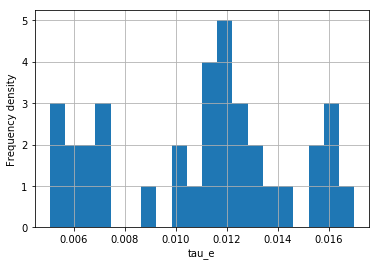

In [16]:
fig1 = mpl.figure(num=5, figsize = (6,4))
mpl.hist(tau_e, 20)

mpl.grid(True)
mpl.xlabel('tau_e')
mpl.ylabel('Frequency density')

Text(0,0.5,'Frequency density')

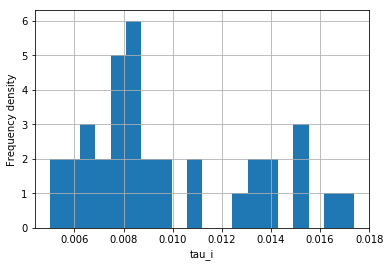

In [17]:
fig2 = mpl.figure(num=5, figsize = (6,4))
mpl.hist(tau_i, 20)

mpl.grid(True)
mpl.xlabel('tau_i')
mpl.ylabel('Frequency density')

Text(0,0.5,'Frequency density')

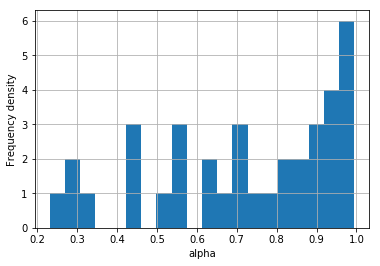

In [18]:
fig3 = mpl.figure(num=5, figsize = (6,4))
mpl.hist(alpha, 20)

mpl.grid(True)
mpl.xlabel('alpha')
mpl.ylabel('Frequency density')

Before we just plot everything, let's import the individual connectome data and see if there's a difference.

In [19]:
Inddata = loadmat(IndConn_params_path)

In [20]:
Indf = pd.DataFrame(Inddata['output'][0])

In [21]:
Indparams = df['param'].values

Itau_e = []
Itau_i = []
Ialpha = []
Ispeed = []
Igei = []
Igii = []
Itau_C = []
i = 0
for array in Indparams:
    if len(array) == 7:
        Itau_e.append(array[0][0])
        Itau_i.append(array[1][0])
        Ialpha.append(array[2][0])
        Ispeed.append(array[3][0])
        Igei.append(array[4][0])
        Igii.append(array[5][0])
        Itau_C.append(array[6][0])
        i += 1
    else:
        subject_name = str(subjects[i][0])
        print(subjects[i][0])
        print('Not all parameters available for subject'+ subject_name)
        i += 1

[]
Not all parameters available for subject[]
[]
Not all parameters available for subject[]
[]
Not all parameters available for subject[]


Text(0,0.5,'Frequency density')

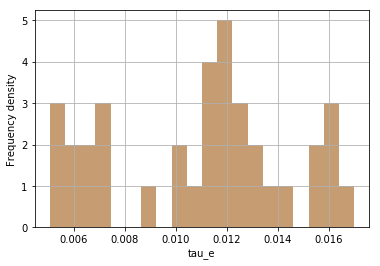

In [22]:
fig1 = mpl.figure(num=5, figsize = (6,4))
mpl.hist(tau_e, 20, alpha = 0.5)
mpl.hist(Itau_e, 20, alpha = 0.5)
mpl.grid(True)
mpl.xlabel('tau_e')
mpl.ylabel('Frequency density')

Text(0,0.5,'Frequency density')

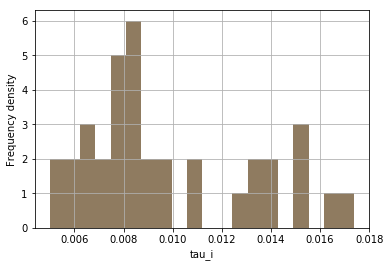

In [23]:
fig2 = mpl.figure(num=5, figsize = (6,4))
mpl.hist(tau_i, 20)
mpl.hist(Itau_i, 20, alpha = 0.5)
mpl.grid(True)
mpl.xlabel('tau_i')
mpl.ylabel('Frequency density')

It seems that individual connectivity has not made a difference to the prior distributions. Let's plot them all.

In [24]:
param_array = [tau_e, tau_i,alpha,speed,gei,gii,tau_C]

In [25]:
param_name = ['tau_e', 'tau_i','alpha','speed','gei','gii','tau_C']

Indicate the bounds used in simulated annealing.

In [26]:
param_lower = [0.005,0.005,0.1,5,0.5,0.5,0.005]
param_upper = [0.02,0.02,1,20,5,5,0.020]

In [27]:
param_array[0] == tau_e

True

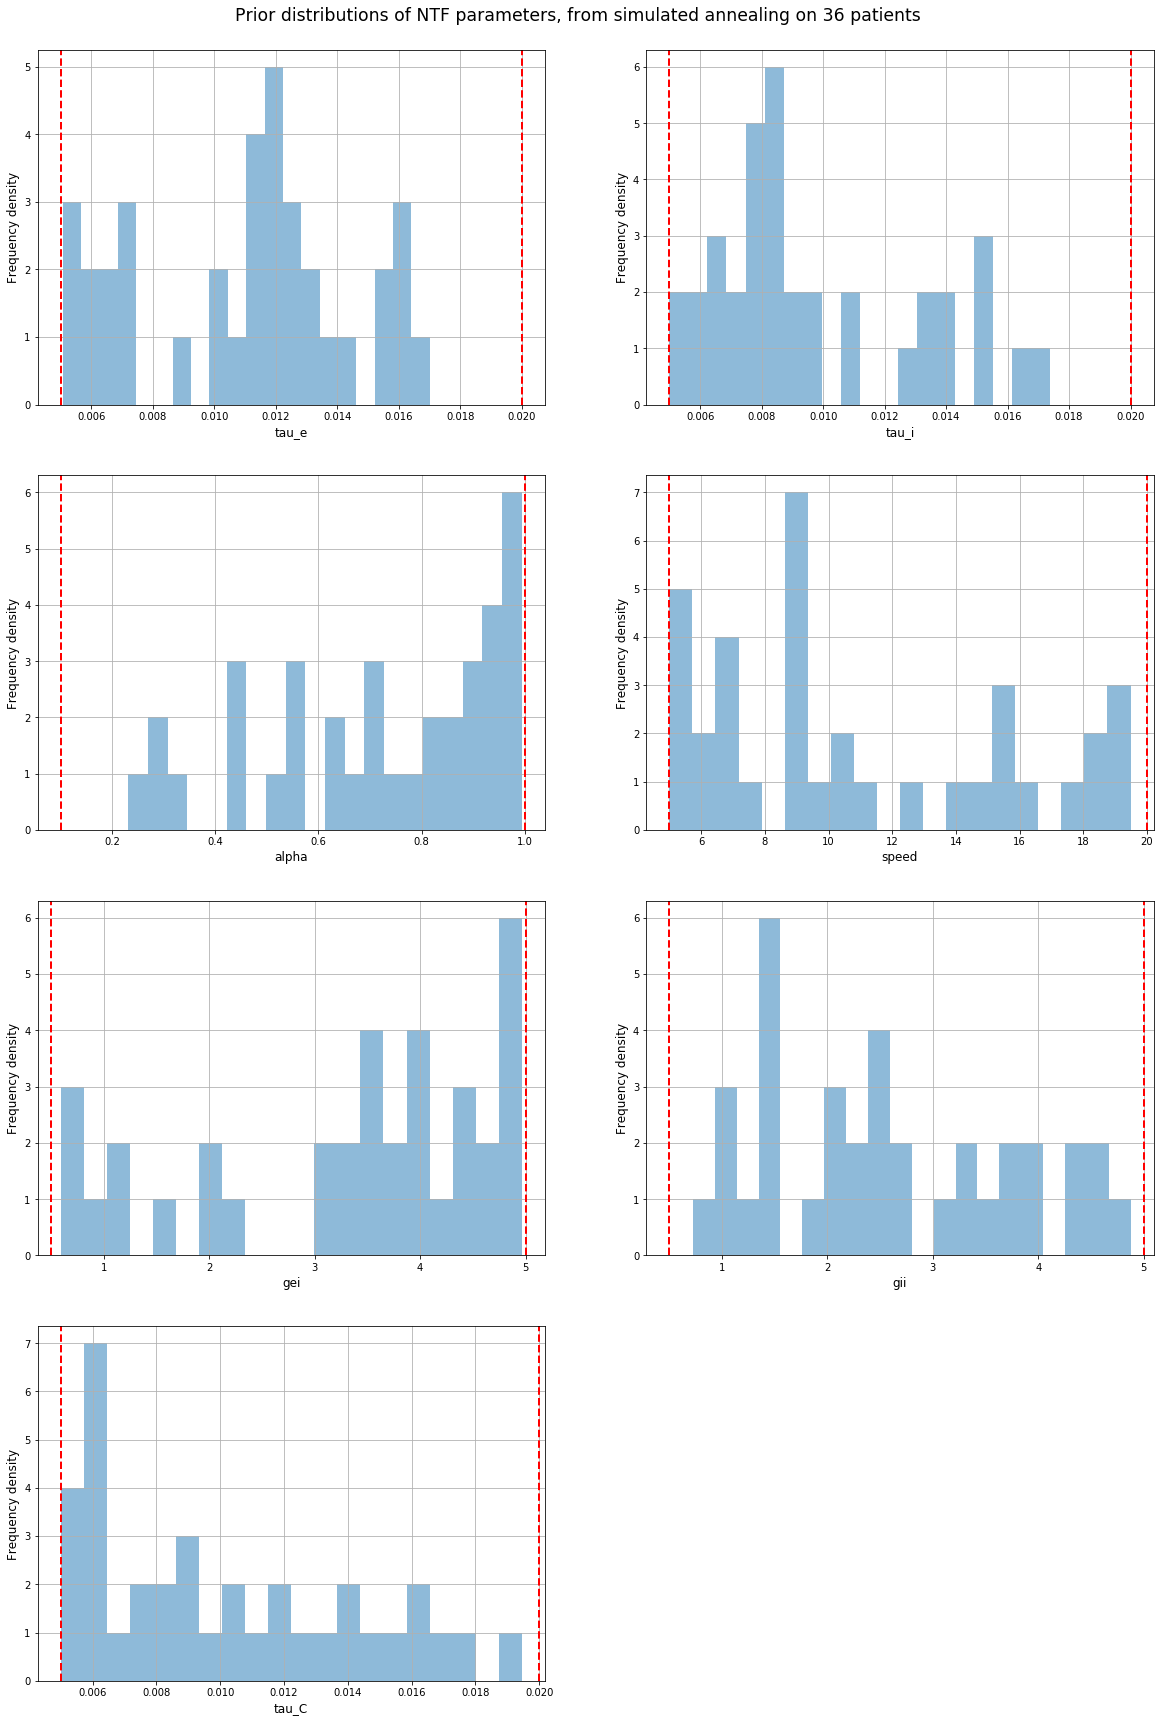

In [28]:
fig3, axes3 = mpl.subplots(4,2, figsize = (20,30))
ax3 = axes3.ravel()
fig3.suptitle('Prior distributions of NTF parameters, from simulated annealing on 36 patients', fontsize = 'xx-large', y = 0.9)
i = 0


for i in range(7):
    mpl.sca(ax3[i])
    mpl.hist(param_array[i], 20, alpha = 0.5)
    ax3[i].grid(True)
    ax3[i].set_ylabel('Frequency density', fontsize = 'large')
    #ax3[i].text(0.9, 0.9,param_name[i],
    # horizontalalignment='center',
    # verticalalignment='center',
    # transform = ax3[i].transAxes, fontsize = 'large')
    ax3[i].set_xlabel(param_name[i], fontsize = 'large')
    ax3[i].axvline(x=param_lower[i], color='r', linestyle='dashed', linewidth=2)
    ax3[i].axvline(x=param_upper[i], color='r', linestyle='dashed', linewidth=2)
    i += 1
mpl.sca(ax3[7])
ax3[7].set_visible(False)
fig3.savefig("paramdistributions_HCPconn.pdf", bbox_inches='tight')

OK, even though it is not initially obvious which distributions should work, let's set up a piece of code to at least do some of the job.

# Systematically testing different distributions

Let's start with a fairly nice parameter distibution: tau_i

## tau_i distribution

### Testing the normal distribution

In [30]:
from scipy import stats
m_taui, s_taui = stats.norm.fit(tau_i)
x = np.linspace(0, 0.04, 100)

Text(0,0.5,'Frequency density')

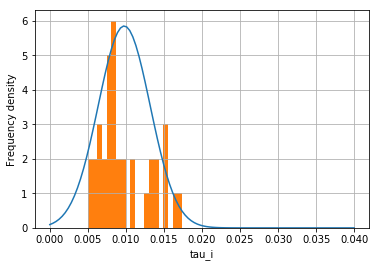

In [31]:
pdf_taui = 0.05*stats.norm.pdf(x, m_taui, s_taui) # now get theoretical values in our interval  
mpl.plot(x, pdf_taui, label="Norm") # plot it
mpl.hist(tau_i, 20)

mpl.grid(True)
mpl.xlabel('tau_i')
mpl.ylabel('Frequency density')
#mpl.title('Errors using linear data')

Fitting to distributions is only useful if we can make some justification as to which is best. To this end, we look at Anderson Darling tests and KS statistics as possible avenues. 

### Statistical tests 

Here we are asking the question -- do we reject the null hypothesis that the samples are drawn from our specified distribution? 

In [32]:
AD, crit_values, siglevels = stats.anderson(tau_i)

In [33]:
AD

1.4411815708455435

In [34]:
siglevels

array([15. , 10. ,  5. ,  2.5,  1. ])

In [35]:
crit_values

array([0.528, 0.601, 0.721, 0.841, 1.   ])

For now, the AD statistic is confusing (although we will return to it) so let's look at the more obvious KS statistic.

## KS Statistic

Let's look at the data and a gamma distribution.

### Gamma distribution

In [36]:
fit_alpha_taui, fit_loc_taui, fit_beta_taui=stats.gamma.fit(tau_i)

In [37]:
print(fit_alpha_taui, fit_loc_taui, fit_beta_taui)

2.006014687419703 0.004662441067103153 0.0025497764353055712


Text(0,0.5,'Frequency density')

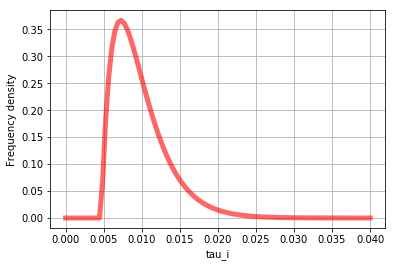

In [38]:
x = np.linspace(0, 0.04, 100)
y = (x - fit_loc_taui)/fit_beta_taui
mpl.plot(x, 1*stats.gamma.pdf(y, fit_alpha_taui),'r-', lw=5, alpha=0.6, label='gamma pdf')
#mpl.hist(tau_i, 20, normed = True)

mpl.grid(True)
mpl.xlabel('tau_i')
mpl.ylabel('Frequency density')

Just from the fit to the gamma distribution, it seems pretty reasonable that a gamma is correct. BUT we need to statistically test this to at least make sure this is not vague.

In [39]:
stats.kstest(tau_i, 'gamma', args=(fit_alpha_taui, fit_loc_taui, fit_beta_taui))

KstestResult(statistic=0.10837113418565747, pvalue=0.7916616902177097)

Before we make a judgement on this, let's do this test for the normal distribution that we fit to the same data.

In [40]:
stats.kstest(tau_i, 'norm', args=(m_taui,s_taui))

KstestResult(statistic=0.17962755469256486, pvalue=0.17326323026925827)

In short, a high KS statistic indicates that the tau_i and random samples of the specified distribution are drawn from different distributions. Looking at the p value: If the two samples were randomly sampled from identical populations, what is the probability that the two cumulative frequency distributions would be as far apart as observed?

Therefore, this suggests (although we need a better way of looking at this) that the gamma distribution is better. This is because in the case of trying to identify the correct diistribution, we are looking for the case of *high* p values. Typically, when people are looking for an 'effect' using p values, they *want* (though should not actively seek -- the dangers of p-hacking!) small p values, as this indicates that the null hypothesis of the sample being drawn from an identical distribution to the one it is being tested against is false. 

The p value for the gamma distribution is high, which is very promising. To make sure we can pick the gamma distribution over all other reasonable shapes, let's test against some others.

### Lognormal distribution

In [41]:
lognorm_s_taui, lognorm_loc_taui, lognorm_scale_taui=stats.lognorm.fit(tau_i)

In [42]:
print(lognorm_s_taui, lognorm_loc_taui, lognorm_scale_taui)

0.5403597268900989 0.0033095491501141444 0.005617604852425967


Text(0,0.5,'Frequency density')

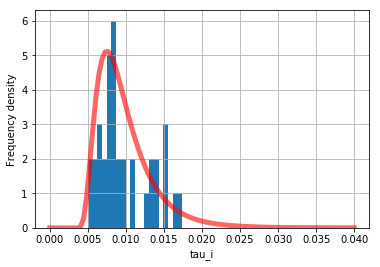

In [43]:
x = np.linspace(0, 0.04, 100)
y = (x - lognorm_loc_taui)/lognorm_scale_taui
mpl.plot(x, 6*stats.lognorm.pdf(y,lognorm_s_taui),'r-', lw=5, alpha=0.6, label='gamma pdf')
mpl.hist(tau_i, 20, normed = False)

mpl.grid(True)
mpl.xlabel('tau_i')
mpl.ylabel('Frequency density')

In [44]:
stats.kstest(tau_i, 'lognorm', args=(lognorm_s_taui, lognorm_loc_taui, lognorm_scale_taui))

KstestResult(statistic=0.11560240666584065, pvalue=0.709580854782915)

Not quite as good as a gamma, but still pretty good.

### Weibull distribution

In [45]:
W_c, W_loc, W_scale=stats.weibull_min.fit(tau_i)

In [46]:
print(W_c, W_loc, W_scale)

0.20719791385736056 0.004999999999999999 1.2211959462436348


Text(0,0.5,'Frequency density')

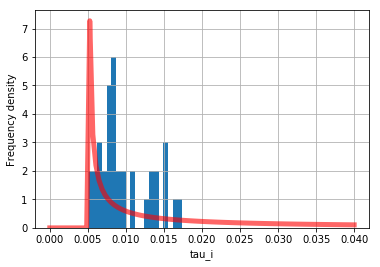

In [47]:
x = np.linspace(0, 0.04, 100)
y = (x - W_loc)/W_scale
mpl.plot(x, 0.05*stats.weibull_min.pdf(y,W_c),'r-', lw=5, alpha=0.6, label='gamma pdf')
mpl.hist(tau_i, 20, normed = False)

mpl.grid(True)
mpl.xlabel('tau_i')
mpl.ylabel('Frequency density')

In [48]:
stats.kstest(tau_i, 'weibull_min', args=(W_c, W_loc, W_scale))

KstestResult(statistic=0.6795981004828637, pvalue=0.0)

This is terrible, even worse than the normal distribution. The p value is low (effectively unreported) -- if you were testing the null hypothesis that the sample was drawn by chance from the Weibull distribution, even with p = 0.01, you would have to reject it. 

## Tau_e distribution

We need to repeat this process for the other distributions. Function to be written to automate this process.

In [49]:
m_taue, s_taue = stats.norm.fit(tau_e)
fit_alpha_te, fit_loc_te, fit_beta_te =stats.gamma.fit(tau_e)
lognorm_s_te, lognorm_loc_te, lognorm_scale_te=stats.lognorm.fit(tau_e)
W_c_te, W_loc_te, W_scale_te=stats.weibull_min.fit(tau_e)

In [50]:
stats.kstest(tau_e, 'weibull_min', args=(W_c_te, W_loc_te, W_scale_te))

KstestResult(statistic=0.7114349705704559, pvalue=0.0)

In [51]:
stats.kstest(tau_e, 'lognorm', args=(lognorm_s_te, lognorm_loc_te, lognorm_scale_te))

KstestResult(statistic=0.14203286032762258, pvalue=0.42663288363008633)

In [52]:
stats.kstest(tau_e, 'norm', args=(m_taue, s_taue))

KstestResult(statistic=0.13775607855326982, pvalue=0.4664710017047442)

In [53]:
stats.kstest(tau_e, 'gamma', args=(fit_alpha_te, fit_loc_te, fit_beta_te))

KstestResult(statistic=0.1457493772993677, pvalue=0.39392554644150923)

Text(0,0.5,'Frequency density')

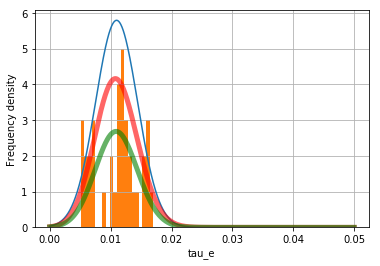

In [54]:
x = np.linspace(0, 0.05, 1000)
y_lognorm = (x - lognorm_loc_te)/lognorm_scale_te
y_gamma = (x - fit_loc_te)/fit_beta_te
y_norm = 0.05*stats.norm.pdf(x, m_taue, s_taue) # now get theoretical values in our interval  
mpl.plot(x, y_norm, label="Norm") # plot it
mpl.plot(x, 200*stats.gamma.pdf(y_gamma, fit_alpha_te),'r-', lw=5, alpha=0.6, label='gamma pdf')
mpl.plot(x, 0.1*stats.lognorm.pdf(y_lognorm,lognorm_s_te),'g-', lw=5, alpha=0.6, label='lognorm pdf')
mpl.hist(tau_e, 20, normed = False)

mpl.grid(True)
mpl.xlabel('tau_e')
mpl.ylabel('Frequency density')

In [55]:
fit_alpha_te, fit_loc_te, fit_beta_te

(368.60117869001476, -0.05550835495379294, 0.00018032146187529007)

In this case, by p values alone, we should argue for a normal distribution (although the similarity of these makes this dubious... more on that later, maybe). It is hard to justify that tau_e and tau_i are any different in the model, so they should probably be taken to follow the same form of distribution. However, the 'a' value we are finding is obviously a bit crazy, so we can perform the fit with a fixed parameter:

In [56]:
fit_alpha_te, fit_loc_te, fit_beta_te =stats.gamma.fit(tau_e, fa = 2)

In [57]:
fit_alpha_te, fit_loc_te, fit_beta_te

(2, 0.004492887509221829, 0.0032375996670863947)

In [58]:
stats.kstest(tau_e, 'gamma', args=(fit_alpha_te, fit_loc_te, fit_beta_te))

KstestResult(statistic=0.22259356778402245, pvalue=0.04772736982546166)

Text(0,0.5,'Frequency density')

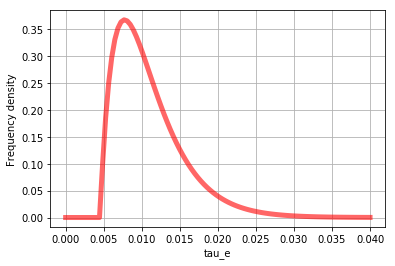

In [59]:
x = np.linspace(0, 0.04, 100)
y = (x - fit_loc_te)/fit_beta_te
mpl.plot(x, 1*stats.gamma.pdf(y, fit_alpha_te),'r-', lw=5, alpha=0.6, label='gamma pdf')
#mpl.hist(tau_e, 20, normed = False)

mpl.grid(True)
mpl.xlabel('tau_e')
mpl.ylabel('Frequency density')

Right now, the p values don't make this very convincing, but we will use these values for now as we design an initial prior distribution and run initial tests, and change as required. 

## Tau_c distribution

This should have the same requirement of the other time constants of not being physically realistic below 0, so we focus on the sort of distributions that are potentially useful there. 

In [60]:
m, s = stats.norm.fit(tau_C)
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(tau_C)
lognorm_s, lognorm_loc, lognorm_scale=stats.lognorm.fit(tau_C)
W_c, W_loc, W_scale=stats.weibull_min.fit(tau_C)

In [61]:
stats.kstest(tau_C, 'weibull_min', args=(W_c, W_loc, W_scale))

KstestResult(statistic=0.7012768608838741, pvalue=0.0)

In [62]:
stats.kstest(tau_C, 'lognorm', args=(lognorm_s, lognorm_loc, lognorm_scale))

KstestResult(statistic=0.12488310587452045, pvalue=0.6004475489108183)

In [63]:
stats.kstest(tau_C, 'norm', args=(m,s))

KstestResult(statistic=0.13479200973624755, pvalue=0.49546074386203753)

In [64]:
stats.kstest(tau_C, 'gamma', args=(fit_alpha, fit_loc, fit_beta))

KstestResult(statistic=0.2161940752130443, pvalue=0.05886882973204055)

Text(0,0.5,'Frequency density')

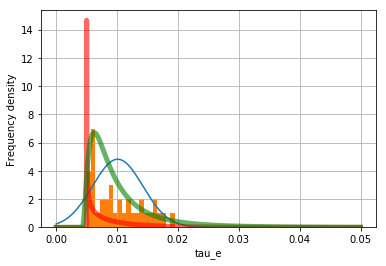

In [65]:
x = np.linspace(0, 0.05, 1000)
y_lognorm = (x - lognorm_loc)/lognorm_scale
y_gamma = (x - fit_loc)/fit_beta
y_norm = 0.05*stats.norm.pdf(x, m, s) # now get theoretical values in our interval  
mpl.plot(x, y_norm, label="Norm") # plot it
mpl.plot(x, 1*stats.gamma.pdf(y_gamma, fit_alpha),'r-', lw=5, alpha=0.6, label='gamma pdf')
mpl.plot(x, 10*stats.lognorm.pdf(y_lognorm,lognorm_s),'g-', lw=5, alpha=0.6, label='lognorm pdf')
mpl.hist(tau_C, 20, normed = False)

mpl.grid(True)
mpl.xlabel('tau_e')
mpl.ylabel('Frequency density')

In [66]:
print(lognorm_loc, lognorm_scale)

0.004225748046915246 0.004279317235655809


In [67]:
print(fit_alpha)

0.5872988777931203


The tau_C might make most sense to follow the others as a gamma distribution. However, here the challenge is that the bounds imposed on the values have caused a crowding at those bounds, which makes the rise of a gamma hard to fit. The gamma tries to fit (and does a reasonable job of capturing the long tail) but can't manage as well. 

We can try to impose a fixed value of alpha and see if that helps.

In [68]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(tau_C, fa = 2)

In [69]:
print(fit_alpha, fit_loc, fit_beta)

2 0.004211819821836749 0.0029499360144432463


In [70]:
stats.kstest(tau_C, 'gamma', args=(fit_alpha, fit_loc, fit_beta))

KstestResult(statistic=0.1523227103852857, pvalue=0.34039450755469614)

Text(0,0.5,'Frequency density')

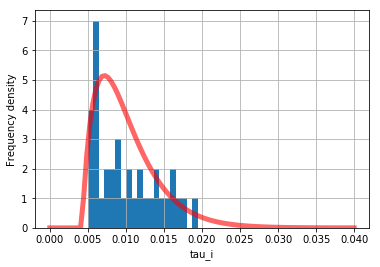

In [71]:
x = np.linspace(0, 0.04, 100)
y = (x - fit_loc)/fit_beta
mpl.plot(x, 14*stats.gamma.pdf(y, fit_alpha),'r-', lw=5, alpha=0.6, label='gamma pdf')
mpl.hist(tau_C, 20, normed = False)

mpl.grid(True)
mpl.xlabel('tau_i')
mpl.ylabel('Frequency density')

The p value is not super high, but a)this looks a lot more sensible and b)typically to regret a null hypothesis (it doesn't come from the same distribution that we are comparing it to) we look for the p value to be less than p = 0.05 or similar. It isn't quite the same in the case of distribution finding, but we need to decide to prioritise having similar shaped distributions on physical argument grounds, or go with the most statistically justified. 

## Distributions for the other variables.

Here, due in part to the values running in to bounds in some cases, and just the small amount of data available, we first examine whether these variables can be described by uniform distributions.

### alpha

In [ ]:
loc, scale=stats.uniform.fit(alpha, floc = 0)

In [ ]:
scale

We already know this is problematic because 'alpha' ran in to a boundary while fitting.

### speed

In [ ]:
speed_loc, speed_scale=stats.uniform.fit(speed, floc = 0)

In [ ]:
speed_scale

Uniform fits don't help much here because they just recover the known bounds.

### gii

This looks a bit like a gamma dist. Let's take a look.

In [ ]:
m, s = stats.norm.fit(gii)
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(gii)
lognorm_s, lognorm_loc, lognorm_scale=stats.lognorm.fit(gii)
W_c, W_loc, W_scale=stats.weibull_min.fit(gii)

In [ ]:
stats.kstest(gii, 'weibull_min', args=(W_c, W_loc, W_scale))

In [ ]:
stats.kstest(gii, 'lognorm', args=(lognorm_s, lognorm_loc, lognorm_scale))

In [ ]:
stats.kstest(gii, 'norm', args=(m,s))

In [ ]:
stats.kstest(gii, 'gamma', args=(fit_alpha, fit_loc, fit_beta))

Indeed, the most 'favoured' out of the distributions I am checking is the gamma. Let's plot that. 

In [ ]:
x = np.linspace(0,10, 100)
y = (x - fit_loc)/fit_beta
mpl.plot(x, 2*gamma.pdf(y, fit_alpha),'r-', lw=5, alpha=0.6, label='gamma pdf')
mpl.hist(gii, 20, normed = True)

mpl.grid(True)
mpl.xlabel('gii')
mpl.ylabel('Frequency density')

Yes, this doesn't seem *completely* unreasonable. However, because I am not making the same sort of claim about gei, I want to be consistent by using a uniform prior for both.

### The others

The problem with the other parameters is that it looks slightly like they have run up against the bounds when they were being randomly sampled in the simulated annealing. For now, the most I want to do is assume uniform distributions, and hope to make a sufficiently large enough space to select from that decent posteriors can be found. 